##  Linear Regression Analysis

### *Explore the factors that might reduce the percent of FGM*

#### Step1: Load Data 

In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("FGM_All.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
df.head()

,Country,Prevarence_G_W,Prevarence_G,Urban_G_W,Rural_G_W,Urban_G,Rural_G,Low_Income_G_W,Second_Low_Income_G_W,Middle_income_G_W,...,With_Bank_Account_Female,With_Bank_Account_Male,Upper2ndary_Educ_Female,Upper2ndary_Educ_Male,With_Job_Female_Tot,With_Job_Male_Tot,With_Job_Female_Rural,With_Job_Male_Rural,With_Job_Female_Urban,With_Job_Male_Urban
0,Benin,9.2,0.1,5.2,13.48,0.1,0.1,16.2,13.5,10.3,...,28.59,48.62,NaN,NaN,69.6992,74.3758,73.2847,77.9530,65.2832,70.0858
1,Burkina_Faso,75.8,13.3,68.7,78.40,6.9,14.7,77.3,78.1,77.8,...,34.50,51.28,1.57192,4.29634,58.2901,74.6037,59.2940,76.6422,55.1430,69.1376
2,Cameroon,1.4,NaN,0.9,2.10,NaN,NaN,1.3,4.0,1.0,...,30.03,39.24,11.47701,25.39947,67.1926,77.5023,73.8870,80.0758,58.3866,74.4408
3,Central African Republic,24.2,NaN,18.1,28.70,NaN,NaN,33.6,31.2,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chad,38.4,9.9,40.1,37.90,8.8,10.1,46.1,42.0,37.0,...,14.85,29.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Select features that might be associated with FGM practice

selected_features = df[['Prevarence_G_W','Urban_G_W', 'Rural_G_W', 'Low_Income_G_W', 'Middle_income_G_W', 'High_Income_G_W', 'Oppose_Cont_G_W','Oppose_Cont_B_M','Upper2ndary_Educ_Female','Upper2ndary_Educ_Male']]
selected_features

,Prevarence_G_W,Urban_G_W,Rural_G_W,Low_Income_G_W,Middle_income_G_W,High_Income_G_W,Oppose_Cont_G_W,Oppose_Cont_B_M,Upper2ndary_Educ_Female,Upper2ndary_Educ_Male
0,9.20,5.20,13.48,16.20,10.3,2.30,86.30,88.8,NaN,NaN
1,75.80,68.70,78.40,77.30,77.8,68.46,NaN,NaN,1.57192,4.29634
2,1.40,0.90,2.10,1.30,1.0,0.70,84.10,84.6,11.47701,25.39947
3,24.20,18.10,28.70,33.60,26.0,14.90,NaN,NaN,NaN,NaN
4,38.40,40.10,37.90,46.10,37.0,37.30,45.10,48.6,NaN,NaN
5,36.70,30.80,43.80,50.00,43.3,20.00,79.40,82.1,6.94469,15.25335
6,94.00,93.90,97.60,96.90,93.6,92.60,51.00,NaN,NaN,NaN
7,87.20,77.40,92.60,94.40,92.2,69.80,37.45,27.9,NaN,NaN
8,83.00,80.00,85.00,89.40,84.4,75.20,82.20,84.9,NaN,NaN
9,65.20,53.90,68.40,65.00,69.0,57.30,79.30,86.7,5.65992,12.68877


#### Step 2:  Quick Check on How Each Variable Relate

Text(0, 0.5, 'FGM Prevarence%')

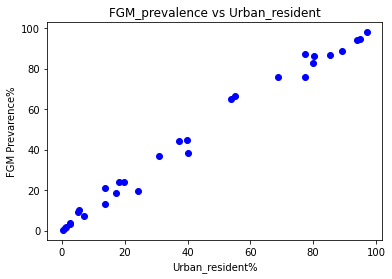

In [44]:

x_axis=selected_features.Urban_G_W
y_axis=selected_features.Prevarence_G_W

plt.plot(x_axis, y_axis, 'o', color='blue');
plt.title("FGM_prevalence vs Urban_resident")
plt.xlabel("Urban_resident%")
plt.ylabel("FGM Prevarence%")

Text(0, 0.5, 'FGM Prevarence%')

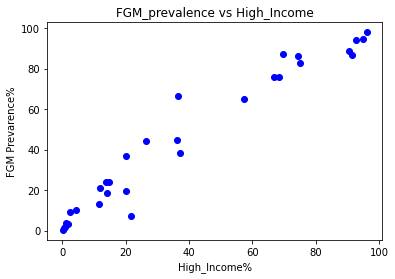

In [45]:
x_axis=selected_features.High_Income_G_W
y_axis=selected_features.Prevarence_G_W

plt.plot(x_axis, y_axis, 'o', color='blue');
plt.title("FGM_prevalence vs High_Income")
plt.xlabel("High_Income%")
plt.ylabel("FGM Prevarence%")

Text(0, 0.5, 'FGM Prevarence%')

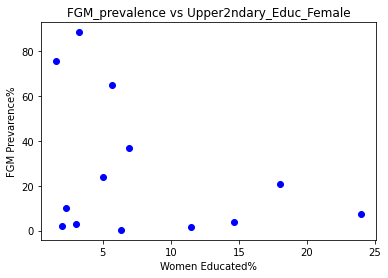

In [47]:
x_axis=selected_features.Upper2ndary_Educ_Female
y_axis=selected_features.Prevarence_G_W

plt.plot(x_axis, y_axis, 'o', color='blue');
plt.title("FGM_prevalence vs Upper2ndary_Educ_Female")
plt.xlabel("Women Educated%")
plt.ylabel("FGM Prevarence%")

Text(0, 0.5, 'FGM Prevarence%')

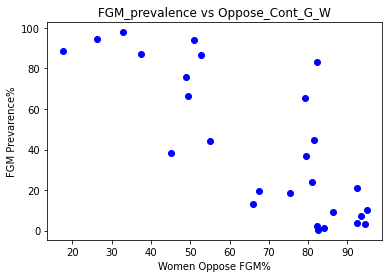

In [96]:
x_axis=selected_features.Oppose_Cont_G_W
y_axis=selected_features.Prevarence_G_W

plt.plot(x_axis, y_axis, 'o', color='blue');
plt.title("FGM_prevalence vs Oppose_Cont_G_W")
plt.xlabel("Women Oppose FGM%")
plt.ylabel("FGM Prevarence%")

#### Step 3: Select Independent and Dependent Variables

In [69]:
selected_features1 = df[['Prevarence_G_W','Urban_G_W','Rural_G_W','Low_Income_G_W', 'High_Income_G_W', 'Oppose_Cont_G_W','Upper2ndary_Educ_Female','Upper2ndary_Educ_Male']]
selected_features1

,Prevarence_G_W,Urban_G_W,Rural_G_W,Low_Income_G_W,High_Income_G_W,Oppose_Cont_G_W,Upper2ndary_Educ_Female,Upper2ndary_Educ_Male
0,9.20,5.20,13.48,16.20,2.30,86.30,NaN,NaN
1,75.80,68.70,78.40,77.30,68.46,NaN,1.57192,4.29634
2,1.40,0.90,2.10,1.30,0.70,84.10,11.47701,25.39947
3,24.20,18.10,28.70,33.60,14.90,NaN,NaN,NaN
4,38.40,40.10,37.90,46.10,37.30,45.10,NaN,NaN
5,36.70,30.80,43.80,50.00,20.00,79.40,6.94469,15.25335
6,94.00,93.90,97.60,96.90,92.60,51.00,NaN,NaN
7,87.20,77.40,92.60,94.40,69.80,37.45,NaN,NaN
8,83.00,80.00,85.00,89.40,75.20,82.20,NaN,NaN
9,65.20,53.90,68.40,65.00,57.30,79.30,5.65992,12.68877


In [70]:
# Drop the null rows
selected_features2 = selected_features1.dropna()
selected_features2

,Prevarence_G_W,Urban_G_W,Rural_G_W,Low_Income_G_W,High_Income_G_W,Oppose_Cont_G_W,Upper2ndary_Educ_Female,Upper2ndary_Educ_Male
2,1.4,0.9,2.1,1.30,0.7,84.10,11.47701,25.39947
5,36.7,30.8,43.8,50.00,20.0,79.40,6.94469,15.25335
9,65.2,53.9,68.4,65.00,57.3,79.30,5.65992,12.68877
11,3.8,2.5,5.3,12.80,1.1,92.47,14.67860,27.24011
14,7.4,7.0,8.3,1.40,21.7,93.60,23.94748,34.38337
15,21.0,13.8,25.9,39.80,12.0,92.47,18.00121,25.71248
17,88.6,89.2,88.4,86.47,90.4,17.47,3.24330,8.22355
20,2.0,1.2,2.1,1.70,1.0,82.40,1.98776,4.99652
22,24.0,19.8,28.2,40.80,13.7,80.90,5.00873,17.26285
26,3.1,2.5,3.6,4.20,1.9,94.50,3.03632,17.39877


#### Step 4: Reshape the Data for Regression Analysis

In [91]:

X=selected_features2[['Urban_G_W','Rural_G_W','Low_Income_G_W','High_Income_G_W','Oppose_Cont_G_W','Upper2ndary_Educ_Female']]
y=selected_features2['Prevarence_G_W'].values.reshape(-1,1)
print(X.shape, y.shape)

(12, 6) (12, 1)


#### Step 5: Split the Data for Creating Test and Train Sets

In [92]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Step 6: Create Linear Regression Model

In [93]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### Step 7: Fit the Model to the Training and Test Sets

In [94]:
 # Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

#### Step 8: Outcome
*The direction of the 'Oppose_Cont_G_W','Upper2ndary_Educ_Female' is negative. This indicates that the larger %s of women with upper secondary education and of those opposing FGM are associated with lower percent of FGM.*

In [95]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(f"coefficient :{model.coef_}")

Training Score: 0.9999937147783876
Testing Score: 0.994284213912738
coefficient :[[ 0.09925505  0.61978635  0.01405729  0.28735926 -0.00640573 -0.03287766]]
